In [459]:
import pandas as pd
import numpy as np
import seaborn as sns

In [460]:
scan_file = pd.read_excel("./annotation.xlsx", sheet_name="scan_file")
less_scanned = pd.read_excel("./annotation.xlsx", sheet_name="less_scanned")
tooth = pd.read_excel("./annotation.xlsx", sheet_name="tooth")
abutment = pd.read_excel("./annotation.xlsx", sheet_name="abutment")
restoration = pd.read_excel("./annotation.xlsx", sheet_name="restoration")

In [466]:
# df = restoration = pd.read_excel("./annotation.xlsx", sheet_name="restoration")
df = abutment.set_index('patient_id')

In [462]:
posterior = []
for start in [10, 20, 40, 30]:
    posterior += list(np.arange(start+8, start+3, -1))
# posterior = list(map(str, posterior))

In [463]:
label_count = pd.DataFrame(df.notnull().sum()).T
label_count

,18,17,16,15,14,13,12,11,21,22,...,42,41,31,32,33,34,35,36,37,38
0,0,222,343,268,190,96,100,115,121,102,...,37,26,28,35,51,104,206,359,320,5


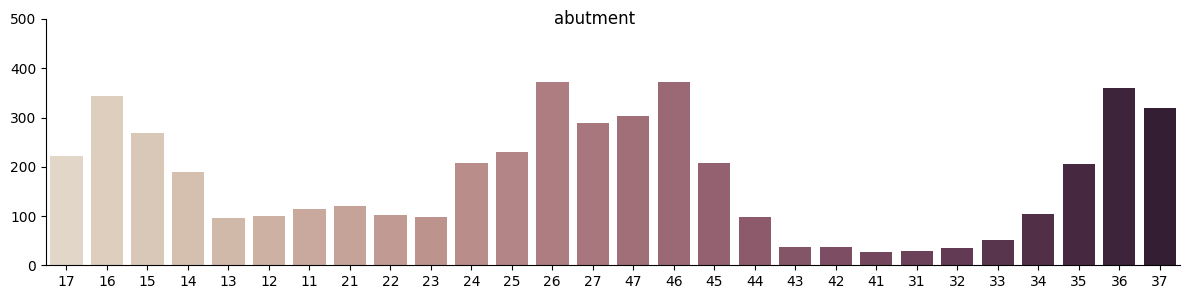

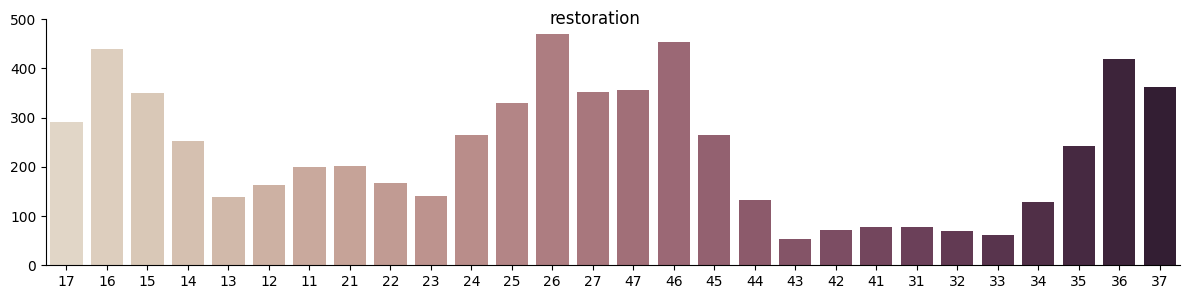

In [464]:
# scan_file, less_scanned, tooth
for name, _df in zip(["abutment", "restoration"], [abutment, restoration]):
    df = _df.set_index('patient_id')
    df = df.drop([18,28,38,48], axis=1)
    label_count = pd.DataFrame(df.describe().loc['count']).T
    g = sns.catplot(data=label_count, kind='bar', palette="ch:.25",
               height=3, aspect=4);
    
    g.fig.suptitle(name)
    g.set(ylim=(0, 500))

In [467]:
# df = abut.set_index('patient_id')
df = abutment.set_index('patient_id')
all_label = pd.Series(df.values.reshape(-1)).dropna().unique()
all_label = list(all_label)
all_label

['prep',
 'abutment',
 'healing',
 'healing ab',
 'stock ab',
 'denturue prep',
 'stock abutment',
 'custom abutment',
 'inlay prep',
 'healing abutment',
 'bridge custom abutment',
 'denture',
 'denture prep',
 'emergency profile']

In [468]:
count_df = pd.DataFrame(index=all_label, columns=df.columns)
count_df.loc[:,:] = 0

for col in df.columns:
    count_ds = df[col].value_counts()
    count_df.loc[count_ds.index, col] += count_ds
#     print(count_df)
# count_df = count_df.reset_index()
# count_df = count_df.rename(columns = {"index":'label'})

In [469]:
count_df

,18,17,16,15,14,13,12,11,21,22,...,42,41,31,32,33,34,35,36,37,38
prep,0,104,171,139,98,53,63,77,82,54,...,24,14,18,22,31,60,115,160,139,3
abutment,0,105,150,114,76,42,37,38,38,47,...,12,12,10,13,18,39,82,177,154,2
healing,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
healing ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stock ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
denturue prep,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
stock abutment,0,0,2,5,2,0,0,0,0,0,...,0,0,0,0,0,0,2,3,2,0
custom abutment,0,9,15,8,11,1,0,0,0,1,...,1,0,0,0,0,2,6,19,21,0
inlay prep,0,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
healing abutment,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,0


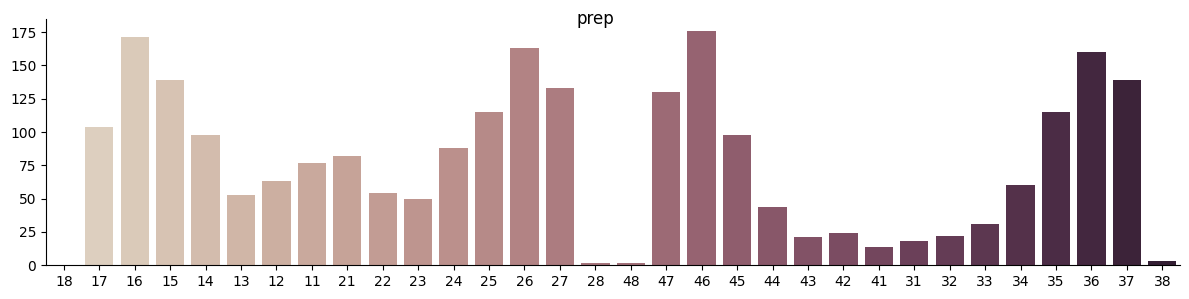

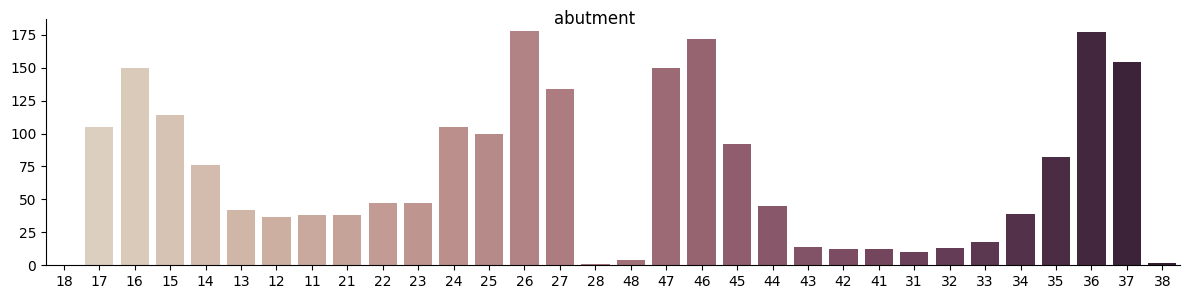

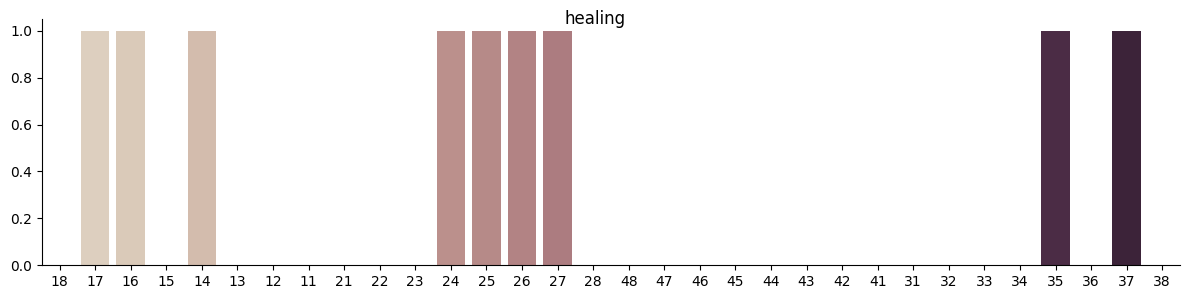

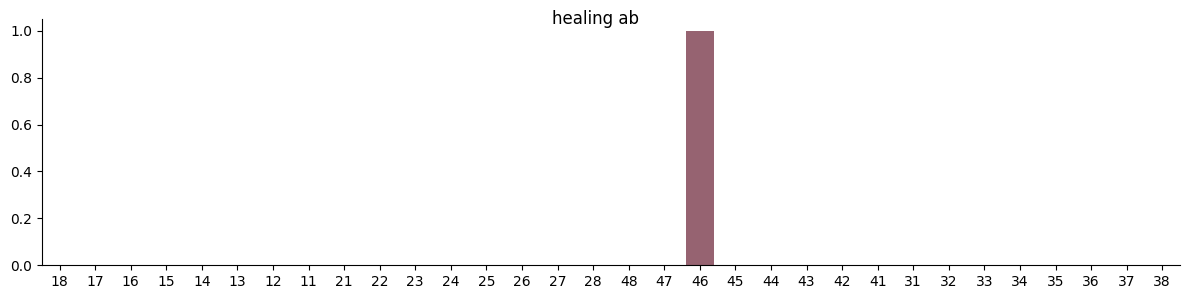

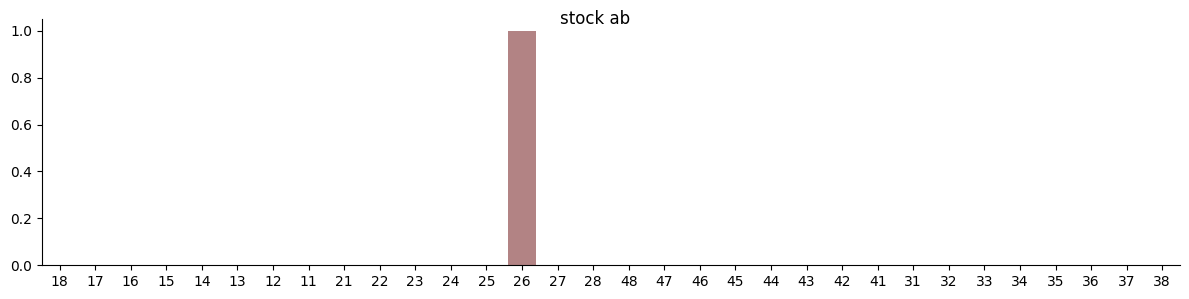

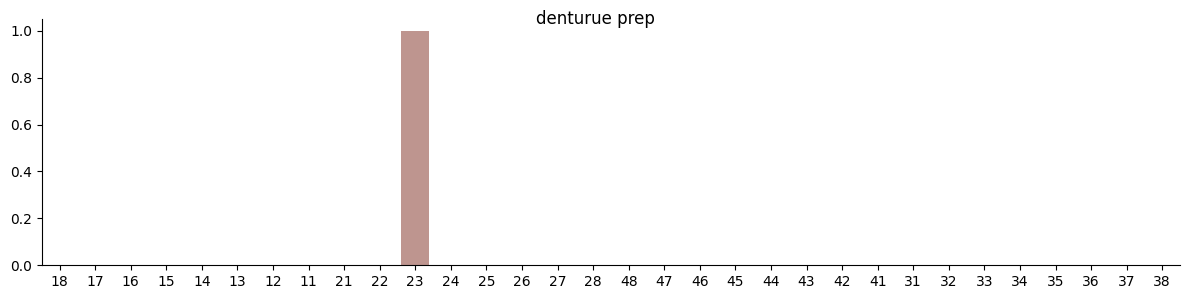

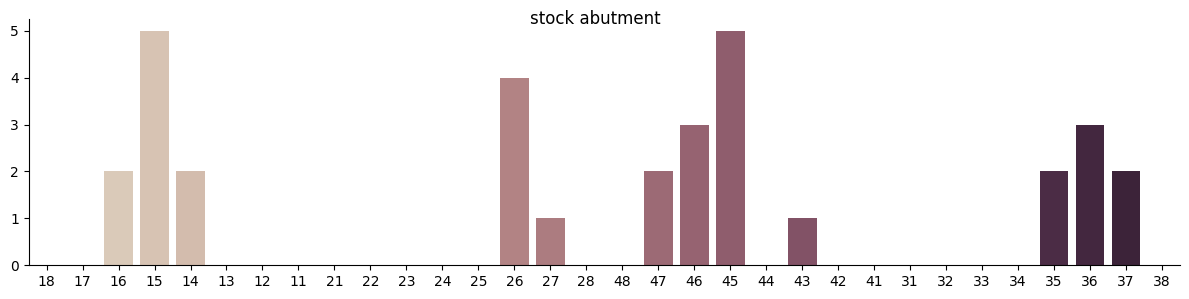

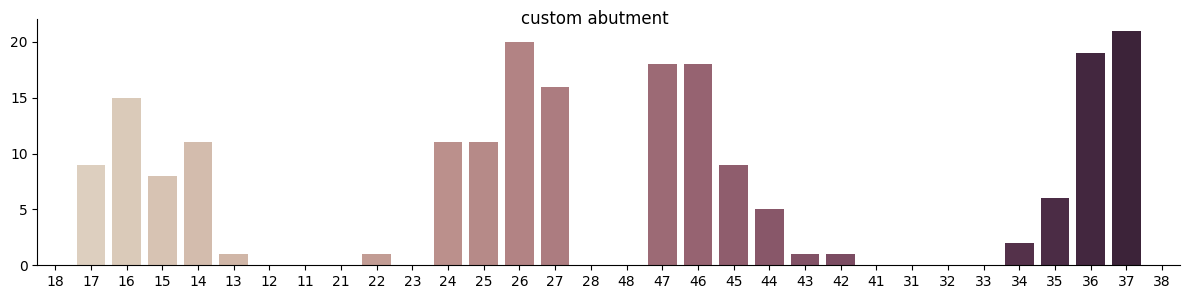

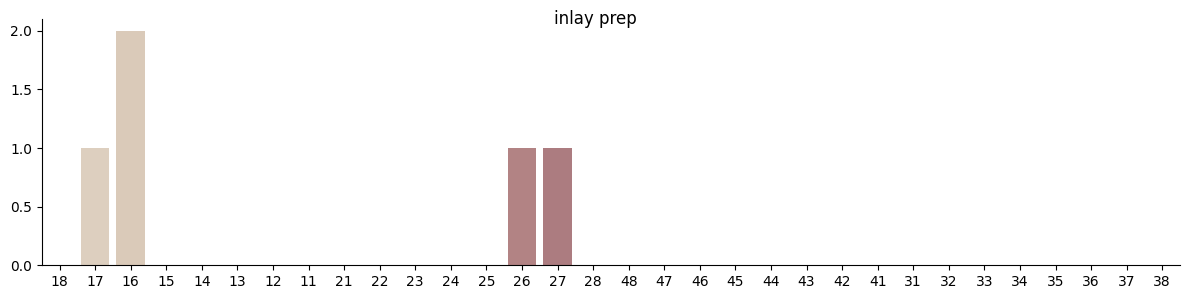

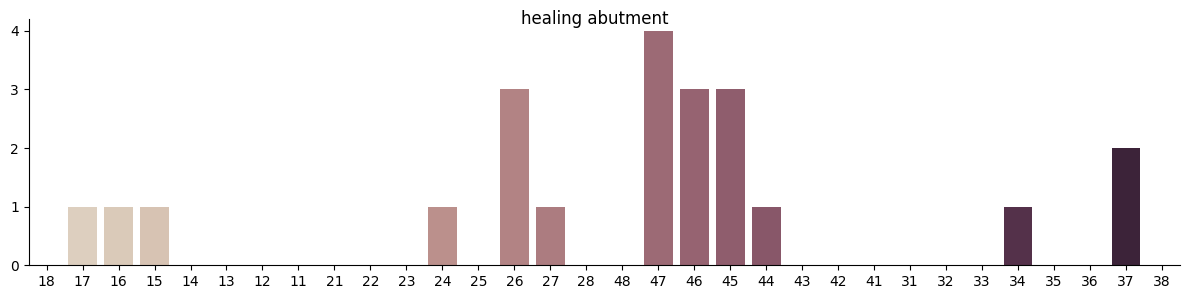

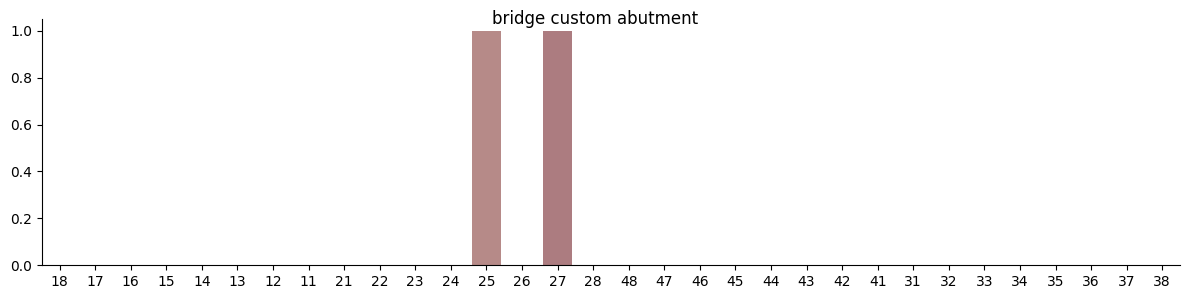

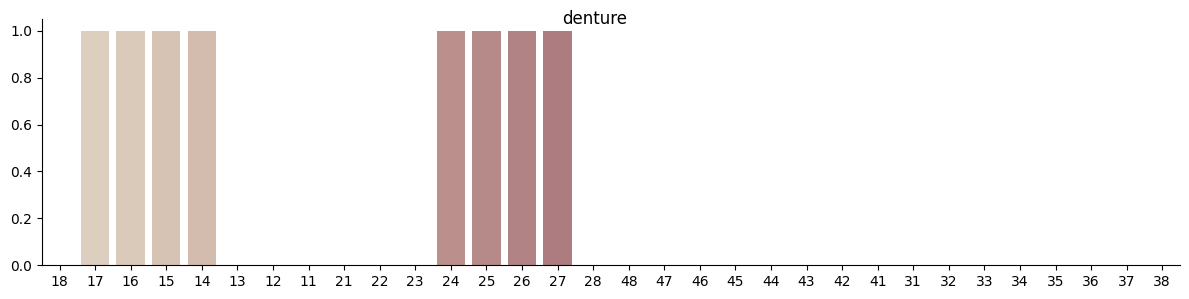

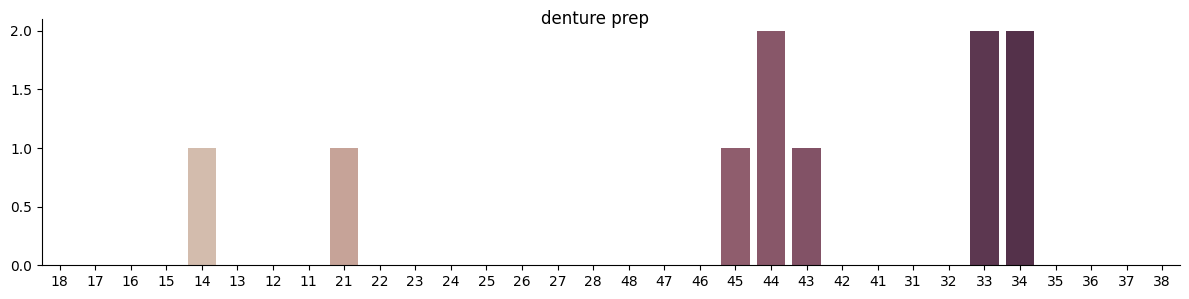

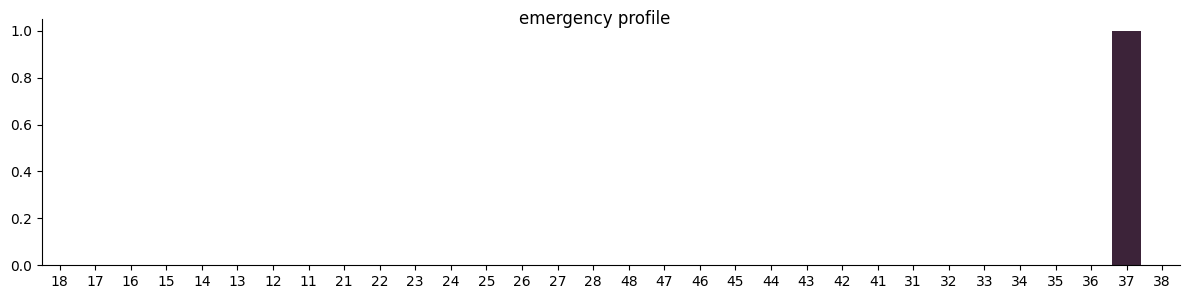

In [470]:
# scan_file, less_scanned, tooth
for name in count_df.index:
    g = sns.catplot(data=count_df.loc[[name]], kind='bar', palette="ch:.25",
               height=3, aspect=4);
    
    g.fig.suptitle(name)
#     g.set(ylim=(0, 200))